In [1]:
%matplotlib inline
import numpy as np
import h5py
import os
from functools import reduce
from imp import reload 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from hangul.read_data import load_data, load_images, load_all_labels
from matplotlib import cm
from hangul import style

## Variation across fonts for 1 character

In [2]:
fonts = ['GothicA1-Regular', 'NanumMyeongjo', 'NanumBrush', 'Stylish-Regular']

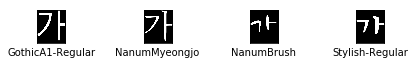

In [5]:
# appendix figure 3

fig, ax = plt.subplots(1,4, sharey=True, figsize=(6,1))
for ii,font in enumerate(fonts):
    image = load_images('/data/hangul/h5s/{}/{}_500.h5'.format(font, font), median_shape=True)
    ax[ii].imshow(image[0], cmap='gray')
    ax[ii].set_xlabel(font, fontsize=10)
    ax[ii].set_xticks([]) 
    ax[ii].set_yticks([]) 
plt.tight_layout()
plt.savefig('/home/ahyeon96/hangul_misc/4fonts.pdf', dpi=300)
plt.show()

## Mean, Median, Std

In [3]:
fontsfolder = '/data/hangul/h5s'
fontnames = os.listdir(fontsfolder)
len(fontnames)

35

In [4]:
fontnames[0] = fonts[0]
fontnames[1] = fonts[1]
fontnames[2] = fonts[2]
fontnames[3] = fonts[3]

In [5]:
# all blocks all fonts
newdata = []
alldata_unconcat = []
for fontname in fontnames:
    fname = os.path.join(fontsfolder, '{}/{}_24.h5'.format(fontname,fontname))
    image = load_images(fname, median_shape=True)
    newdata.append(image)
    alldata_unconcat.append(image)
newdata = np.concatenate(newdata, axis=0)
    
#all blocks w/in 1 font
fontname = 'GothicA1-Regular'
fname = os.path.join(fontsfolder, '{}/{}_24.h5'.format(fontname,fontname))
image = load_images(fname, median_shape=True)
data_1font = image
    
# single block all fonts
data_1block = []
for fontname in fontnames:
    fname = os.path.join(fontsfolder, '{}/{}_24.h5'.format(fontname,fontname))
    image = load_images(fname, median_shape=True)
    data_1block.append(image[0])
data_1block = np.asarray(data_1block)

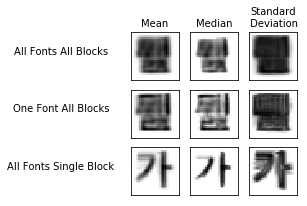

In [21]:
# appendix figure 5
# mean, median, std

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize = (3,3))
axes = axes.flatten()
axes[0].imshow(newdata.mean(axis=0), cmap = 'gray_r')
axes[0].set_xticks([], [])
axes[0].set_yticks([], [])
axes[0].set_title('Mean', fontsize=10)
axes[0].set_ylabel('All Fonts All Blocks', rotation=0, fontsize=10, labelpad=70)
axes[1].imshow(np.median(newdata, axis=0), cmap = 'gray_r')
axes[1].set_title('Median', fontsize=10)
axes[2].imshow(newdata.std(axis=0), cmap = 'gray_r')
axes[2].set_title('Standard\n Deviation', fontsize=10)
axes[3].imshow(data_1font.mean(axis=0), cmap = 'gray_r')
axes[3].set_ylabel('One Font All Blocks', fontsize=10, labelpad=70, rotation=0)
axes[4].imshow(np.median(data_1font, axis=0), cmap = 'gray_r')
axes[5].imshow(data_1font.std(axis=0), cmap = 'gray_r')
axes[6].imshow(data_1block.mean(axis=0), cmap = 'gray_r')
axes[6].set_ylabel('All Fonts Single Block', fontsize=10, labelpad=70, rotation=0)
axes[7].imshow(np.median(data_1block, axis=0), cmap = 'gray_r')
axes[8].imshow(np.std(data_1block, axis=0), cmap = 'gray_r')
fig.savefig('/home/ahyeon96/hangul_misc/mms.pdf', dpi=300, bbox_inches='tight')

## Pixels within font for all 40 fonts

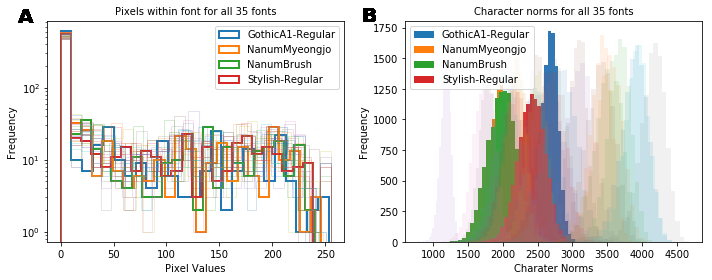

In [7]:
# appendix figure 6

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
for ii,font in enumerate(fontnames):
    if ii<4:
        plt.hist(newdata[ii].ravel(), bins=25, label=font, histtype='step', linewidth=2)
    else:
        plt.hist(newdata[ii].ravel(), bins=25, alpha=0.2, histtype='step')
    plt.yscale('log')
    plt.title('Pixels within font for all 35 fonts', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xlabel('Pixel Values', fontsize=10)
    plt.text(-40, 800, 'A', fontweight='bold', fontsize=20)
    plt.legend()

plt.subplot(1, 2, 2)
for ii,font in enumerate(fontnames):
    if ii<4:
        plt.hist(np.linalg.norm(alldata_unconcat[ii], axis=(1,2)), bins=25, label=font)
    else:
        plt.hist(np.linalg.norm(alldata_unconcat[ii], axis=(1,2)), bins=25, alpha=0.1)
    
    axes = plt.gca()
    plt.title('Character norms for all 35 fonts', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xlabel('Charater Norms', fontsize=10)
    plt.text(-30,1800, 'B', fontweight='bold', fontsize=20)
    plt.legend()

plt.tight_layout()
plt.savefig('/home/ahyeon96/hangul_misc/hist.pdf', dpi=300)   


## Correlations across fonts

In [11]:
n_fonts = len(fontnames)
correlation = np.full((n_fonts, n_fonts), np.nan)
for ii,font in enumerate(fontnames):
    for jj,font in enumerate(fontnames):
        corr = np.corrcoef(alldata_unconcat[ii].flatten(), alldata_unconcat[jj].flatten())[0][1]
        correlation[ii,jj] = corr
np.savez('/home/ahyeon96/hangul_misc/correlation.npz', correlation)

In [8]:
correlation = np.load('/home/ahyeon96/hangul_misc/correlation.npz')
correlation = correlation['arr_0']

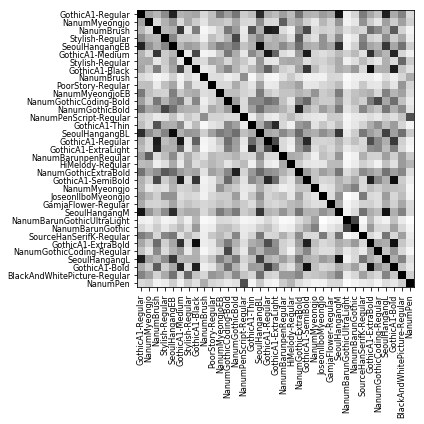

In [9]:
plt.figure(figsize=(6,6))
plt.imshow(correlation, cmap='Greys', label=fontnames)
plt.xticks(np.arange(len(fontnames)),fontnames, rotation=90, fontsize=8)
plt.yticks(np.arange(len(fontnames)),fontnames, fontsize=8)
plt.tight_layout()
# plt.savefig('/home/ahyeon96/data/hangul/results/confmat.pdf')

/home/ahyeon96/anaconda3/envs/hangul/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


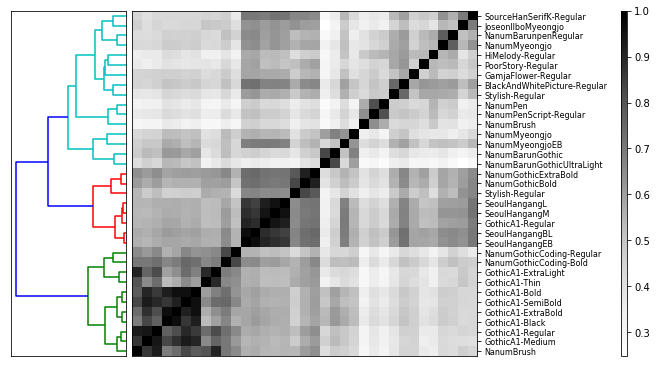

In [10]:
# appendix figure 7

import pylab

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = linkage(correlation, method='ward')
Z1 = dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']

D = correlation[idx1,:]
D2 = D[:,idx1]
fontnames_order = [fontnames[idx] for idx in idx1]
im = axmatrix.matshow(D2, aspect='auto', origin='lower', cmap='Greys')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([1.15,0.1,0.01,0.6])
pylab.colorbar(im, cax=axcolor)

labels1 = ['{}'.format(font) for font in fontnames_order]

axmatrix.set_yticks(range(35))
axmatrix.set_yticklabels(labels1, minor=False, fontsize=8)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

fig.tight_layout()

fig.savefig('/home/ahyeon96/hangul_misc/dendrogram.pdf', bbox_inches='tight', dpi=300)


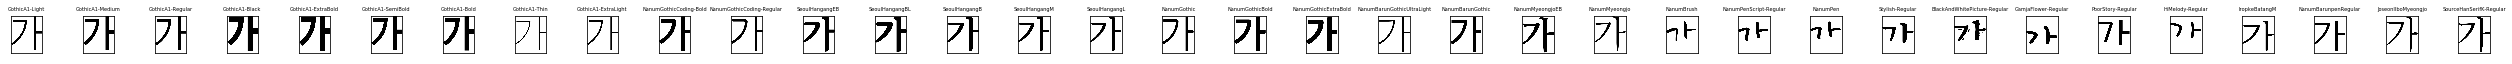

In [16]:
f, axes = plt.subplots(1, len(fontnames_order), figsize=(len(fontnames_order), 1))
for ii,font in enumerate(fontnames_order):
    ax = axes[ii]
    fname = os.path.join(fontsfolder, '{}/{}_500.h5'.format(font,font))
    image = load_images(fname, median_shape=True)
    ax.imshow(image[0], cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(font, fontsize=5)
f.tight_layout()
plt.savefig('/home/ahyeon96/hangul_misc/first_image.pdf', dpi=300)